In [2]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
execfile('Imports.py')
import Modules.Funcs as funcs

points = np.array([[0,0],[.5,.5],[1,0],[1,1],[0,1]])
points2 = points#np.array([[.5,.5],[1.1,-.1],[1.1,1.1]])#np.array([[.5,0],[1,0],[1,1],[.5,1],[.7,.7]])

a = funcs.overlapArea(points,points2)
a

1.0

In [3]:
a = np.inf
a

inf

/Users/sourguyxian/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/Users/sourguyxian/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


(-0.07500000000000001, 1.575, -0.16000000000000003, 1.4899999999999998)

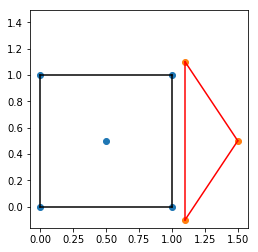

In [72]:
#Compute overlap between categories

#Temp
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
execfile('Imports.py')
import Modules.Funcs as funcs
# points = np.array([[0,0],[1,1],[2,0],[1,1]])#np.random.rand(30, 2)   # 30 random points in 2-D
# points2 = np.array([[0.25,0.6],[1,.6],[.5,.2],[1.5,.8]])
# points3 = np.array([[0,0],[1,1],[2,0],[.5,.2],[.75,4]])
points = np.array([[0,0],[.5,.5],[1,0],[1,1],[0,1]])
points2 = np.array([[1.5,.5],[1.1,-.1],[1.1,1.1]])#np.array([[.5,0],[1,0],[1,1],[.5,1],[.7,.7]])
#make circle
# pstep = .01
# px = np.arange(0,1.+pstep,pstep)
# locus = np.array([.5,.5])
# rad = np.sqrt(.5**2 + .5**2)
# pya = np.sqrt(rad**2 - (px-locus[0])**2) + locus[1]
# pyb = -np.sqrt(rad**2 - (px-locus[0])**2) + locus[1]
# py = np.append(pya,pyb)
# px = np.append(px,px)
# points2 = np.concatenate([[px],[py]],axis=0).T

hull = ConvexHull(points)
hull2 = ConvexHull(points2)


import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    
plt.plot(points2[:,0], points2[:,1], 'o')
for simplex in hull2.simplices:
    plt.plot(points2[simplex, 0], points2[simplex, 1], 'r-')
       
verts1 = np.concatenate((points[hull.vertices],[points[hull.vertices[0]]]),axis=0)
lines1 = [Line(pt,verts1[pi+1]) for pi,pt in enumerate(verts1) if pi<len(verts1)-1]

verts2 = np.concatenate((points2[hull2.vertices],[points2[hull2.vertices[0]]]),axis=0)
lines2 = [Line(pt,verts2[pi+1]) for pi,pt in enumerate(verts2) if pi<len(verts2)-1]

#Get intercepts
ints = []
for l1 in lines1:
    for l2 in lines2:
        (x,y) = intersect(l1,l2)
        if not x is None:
            ints += [intersect(l1,l2)]

#For each vertex, check if it's contained within the other hull
inVerts = []
for p in points[hull.vertices]:
    if isinhull(hull2,p):
        inVerts += [p]
        
for p in points2[hull2.vertices]:
    if isinhull(hull,p):
        inVerts += [p]

overVerts = ints+inVerts
if len(overVerts)>0:
    pvts = np.array(overVerts)
    plt.plot(pvts[:,0],pvts[:,1],'d',markersize=15)    
    hullOver = ConvexHull(overVerts)
    print(hullOver.volume)
plt.axis('square')


# plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
# plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
# plt.show()

In [66]:
np.pi * .5**2

0.7853981633974483

In [32]:
intersect(lines1[3],lines2[3])

(None, None)

In [33]:
ints = []
for l1 in lines1:
    for l2 in lines2:
        (x,y) = intersect(l1,l2)
        if not x is None:
            if x+y==0:
                print(l1.points,l2.points)
                lll
            ints += [intersect(l1,l2)]

(array([[0., 1.],
       [0., 0.]]), array([[0.5, 0. ],
       [1. , 0. ]]))


NameError: name 'lll' is not defined

In [288]:
print(points[hull.vertices])
# print(hull.equations)

#Add first point to end complete the shape
#Break points into pairs
verts1 = np.concatenate((points[hull.vertices],[points[hull.vertices[0]]]),axis=0)
lines1 = [Line(pt,verts1[pi+1]) for pi,pt in enumerate(verts1) if pi<len(verts1)-1]

verts2 = np.concatenate((points2[hull2.vertices],[points2[hull2.vertices[0]]]),axis=0)
lines2 = [Line(pt,verts2[pi+1]) for pi,pt in enumerate(verts2) if pi<len(verts2)-1]

[[0. 0.]
 [2. 0.]
 [1. 1.]]


/Users/sourguyxian/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


In [309]:
#Get intercepts
ints = []
for l1 in lines1:
    for l2 in lines2:
        (x,y) = intersect(l1,l2)
        if not x is None:
            ints += [intersect(l1,l2)]
# ints = np.array(ints)

In [310]:
#For each vertex, check if it's contained within the other hull
inVerts = []
for p in points[hull.vertices]:
    if isinhull(hull2,p):
        inVerts += [p]
        
for p in points2[hull2.vertices]:
    if isinhull(hull,p):
        inVerts += [p]
                

In [311]:
overVerts = ints+inVerts
overVerts

[array([1.02702703, 0.97297297]),
 array([1.3125, 0.6875]),
 array([0.92307692, 0.92307692]),
 array([0.38461538, 0.38461538]),
 array([0.5, 0.2])]

In [34]:
class Line(object):
    #Get the equation of the line crossing pointA and pointB
    #Assuming 2-dimensions for simplicity
    #First argument can also be nparray or list containing the two points
    def __init__(self,pointA,pointB=None):
        if pointB is None and len(pointA)==2:
            pointB = pointA[1]
            pointA = pointA[0]
        self.points = np.array([pointA,pointB])
        self.eq = self.mc(self.points)
        self.xs = np.array([pointA[0],pointB[0]])
        self.ys = np.array([pointA[1],pointB[1]])
    def mc(self,points):
        A = np.array(points[0],dtype=float)
        B = np.array(points[1],dtype=float)
        diff = A-B
        if diff[0]==0:
            self.xloc = A[0]
        m = diff[1]/diff[0]
        c = A[1] - m*A[0]
        return (m,c)
    
    def checkxy(self,x,y,line2):
        #Check that x- and y-value of intercept lies within ranges of lines 
        yr1 = self.ys
        yr2 = line2.ys
        yrs = [yr1,yr2]
        for yr in yrs:
            if y<min(yr)or y>max(yr):
                return False
        
        xr1 = self.xs
        xr2 = line2.xs
        xrs = [xr1,xr2]
        for xr in xrs:
            if x<min(xr)or x>max(xr):
                return False
        #If all good, return True
        return True

def intersect(line1,line2):
    #Get the intersect between two lines
    #If it doesn't exist within the ranges of the lines, return None
    #line1 and line2 are line Objects created with Line(pointA,pointB)    
    m1,c1 = line1.eq
    m2,c2 = line2.eq 
    #if m's are equal, they're parallel and will never intersect
    if m1==m2:
        return(None,None)
    #Handle straight verticals
    if np.isinf(m1) and np.isinf(m2):
        return(None,None)
    elif np.isinf(m1):
        x = line1.xs[0]
        y = m2*x + c2
        if line1.checkxy(x,y,line2):  
            return np.array((x,y))
        else:
            return (None,None)        
    elif np.isinf(m2):
        x = line2.xs[0]
        y = m1*x + c1
        if line2.checkxy(x,y,line1):  
            return np.array((x,y))
        else:
            return (None,None) 
    
    #Otherwise, derive x and y accordingly
    x = (c2-c1)/(m1-m2)  
    y = m1*x + c1
    if line1.checkxy(x,y,line2):  
        return np.array((x,y))
    else:
        return (None,None)
    
def isinhull(hull,point):
    #Check if point is within the hull
    #If point changes the vertices of the hull, return false
    points = hull.points
    newpoints = np.concatenate([points,[point]])
    newhull = ConvexHull(newpoints)
    pold = points[hull.vertices]
    pnew = newpoints[newhull.vertices]
    if not len(pold) == len(pnew):
        return False
    else: 
        #If same length, test for equivalence across all elements
        if np.all(pold == pnew):
            return True
        else:
            return False
    

/Users/sourguyxian/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


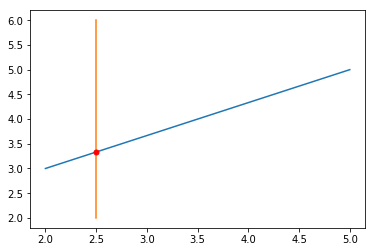

In [252]:
li1 = Line(np.array([[2,3],[5,5]]))
li2 = Line(np.array([[2.5,2],[2.5,6]]))
plt.plot(li1.xs,li1.ys)
plt.plot(li2.xs,li2.ys)
(x,y) = intersect(li1,li2)
if not x is None:
    plt.plot(x,y,'ro',markersize=5)
#a = get_mc([2,3],[4,6])
